In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from tpot import TPOTClassifier
import matplotlib.pyplot as plt

In [2]:
# Load pd_train
pd_train = pd.read_parquet("data/training_class.parquet")
pd_train["label"] = pd_train["Class"].apply(lambda x: 1 if x == "Hepatotoxicity" else 0)
print(pd_train.shape)

(1241, 16094)


In [3]:
# Load pd_test
pd_test = pd.read_parquet("data/testing_class.parquet")
pd_test["label"] = pd_test["Class"].apply(lambda x: 1 if x == "Hepatotoxicity" else 0)
print(pd_test.shape)

(286, 16094)


In [4]:
X_train = pd_train.drop(columns=["Class", "label"])
y_train = pd_train["label"]

X_test = pd_test.drop(columns=["Class", "label"])
y_test = pd_test["label"]

In [2]:
# Example data (replace with actual data)
X = pd.DataFrame(np.random.randn(1000, 16000), columns=[f"feature_{i}" for i in range(16000)])
y = np.random.randint(2, size=1000)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TPOT optimization

In [5]:
# Set up TPOT with basic configuration
tpot = TPOTClassifier(
    generations=5,
    population_size=20,
    verbosity=2,
    scoring="roc_auc",  # AUC
    random_state=42,
    n_jobs=4  # Use 4 cores
)

# Fit the model
tpot.fit(X_train, y_train)

Version 0.12.1 of tpot is outdated. Version 0.12.2 was released Friday February 23, 2024.


Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.7492814875999718

Generation 2 - Current best internal CV score: 0.7492814875999718

Generation 3 - Current best internal CV score: 0.7492814875999718

Generation 4 - Current best internal CV score: 0.7492814875999718

Generation 5 - Current best internal CV score: 0.7492814875999718

Best pipeline: RandomForestClassifier(MinMaxScaler(input_matrix), bootstrap=True, criterion=gini, max_features=0.2, min_samples_leaf=8, min_samples_split=4, n_estimators=100)


TPOTClassifier(generations=5, n_jobs=4, population_size=20, random_state=42,
               scoring='roc_auc', verbosity=2)

In [6]:
# Evaluate the best model found by TPOT
y_pred = tpot.predict(X_test)
y_pred_proba = tpot.predict_proba(X_test)[:, 1]

# Print performance metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Log Loss:", log_loss(y_test, y_pred_proba))
print("AUC:", roc_auc_score(y_test, y_pred_proba))

Accuracy: 0.8146853146853147
Log Loss: 0.47206500243926136
AUC: 0.88771319178559


# PCA optimization

In [ ]:


# List to store AUC scores for different PCA dimensions
auc_scores = []
# dimensions = range(100, 500, 100)  # Check PCA dimensions from 1 to 10
dimensions = [10, 20, 50, 100, 200, 300, 500, 800, 1000, 1200]

# Loop over different numbers of PCA components
for n_components in dimensions:
    # Apply PCA
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    
    # Set up TPOT with basic configuration
    tpot = TPOTClassifier(
        generations=5,
        population_size=20,
        verbosity=2,
        scoring="roc_auc",  # AUC
        random_state=42,
        n_jobs=12  # Use 4 cores
    )
    
    # Fit TPOT on the PCA-transformed data
    tpot.fit(X_train_pca, y_train)
    
    # Access the best pipeline directly after fitting
    best_pipeline = tpot.fitted_pipeline_
    
    # Predict on the test set using the best pipeline and calculate AUC
    y_pred_proba = best_pipeline.predict_proba(X_test_pca)[:, 1]
    auc = roc_auc_score(y_test, y_pred_proba)
    auc_scores.append(auc)
    
    print(f"PCA Components: {n_components}, AUC: {auc}")

Version 0.12.1 of tpot is outdated. Version 0.12.2 was released Friday February 23, 2024.


Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.7214181014189065

Generation 2 - Current best internal CV score: 0.7214181014189065

Generation 3 - Current best internal CV score: 0.7237925728586957

Generation 4 - Current best internal CV score: 0.7237925728586957

Generation 5 - Current best internal CV score: 0.7237925728586957

Best pipeline: RandomForestClassifier(input_matrix, bootstrap=True, criterion=entropy, max_features=0.7000000000000001, min_samples_leaf=6, min_samples_split=13, n_estimators=100)
PCA Components: 10, AUC: 0.8554124608423251


Version 0.12.1 of tpot is outdated. Version 0.12.2 was released Friday February 23, 2024.


Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.7284505986503893

Generation 2 - Current best internal CV score: 0.7349660262605733

Generation 3 - Current best internal CV score: 0.7349660262605733

Generation 4 - Current best internal CV score: 0.7397339284401865

Generation 5 - Current best internal CV score: 0.7397339284401865

Best pipeline: ExtraTreesClassifier(input_matrix, bootstrap=False, criterion=entropy, max_features=0.45, min_samples_leaf=5, min_samples_split=5, n_estimators=100)
PCA Components: 20, AUC: 0.8724678036895231


Version 0.12.1 of tpot is outdated. Version 0.12.2 was released Friday February 23, 2024.


Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.7276337902491832

Generation 2 - Current best internal CV score: 0.7302080224968268

Generation 3 - Current best internal CV score: 0.7347214911808084

Generation 4 - Current best internal CV score: 0.7379771806631509

Generation 5 - Current best internal CV score: 0.7405731403826079

Best pipeline: ExtraTreesClassifier(input_matrix, bootstrap=True, criterion=entropy, max_features=0.7000000000000001, min_samples_leaf=2, min_samples_split=20, n_estimators=100)
PCA Components: 50, AUC: 0.8840236686390532


Version 0.12.1 of tpot is outdated. Version 0.12.2 was released Friday February 23, 2024.


Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.7258786717735033

Generation 2 - Current best internal CV score: 0.7258786717735033

Generation 3 - Current best internal CV score: 0.731647407064029

Generation 4 - Current best internal CV score: 0.731647407064029

Generation 5 - Current best internal CV score: 0.731647407064029

Best pipeline: ExtraTreesClassifier(input_matrix, bootstrap=False, criterion=entropy, max_features=0.35000000000000003, min_samples_leaf=1, min_samples_split=14, n_estimators=100)
PCA Components: 100, AUC: 0.9225896275670031


Version 0.12.1 of tpot is outdated. Version 0.12.2 was released Friday February 23, 2024.


Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]

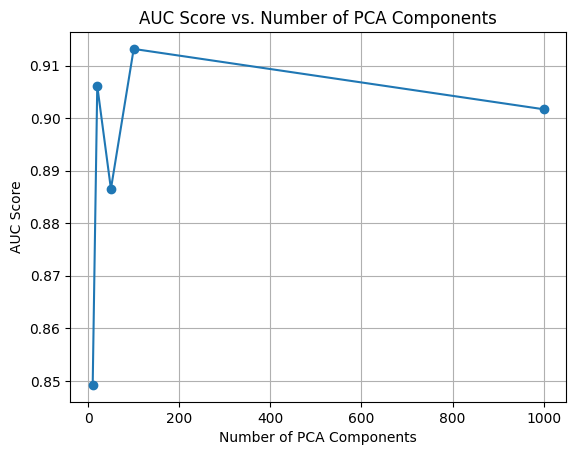

In [8]:

# Plot AUC scores against the number of PCA components
plt.plot(dimensions, auc_scores, marker='o')
plt.xlabel('Number of PCA Components')
plt.ylabel('AUC Score')
plt.title('AUC Score vs. Number of PCA Components')
plt.grid()
plt.show()